In [4]:
import pandas as pd
data = pd.read_csv("bank-additional-full.csv", delimiter=";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
from pycaret.classification import *
exp  = setup(data = data, target = 'y') 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,2926
1,Target Type,Binary
2,Label Encoded,"no: 0, yes: 1"
3,Original Data,"(41188, 21)"
4,Missing Values,False
5,Numeric Features,9
6,Categorical Features,11
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [6]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Gradient Boosting Classifier,0.9151,0.9458,0.5123,0.6596,0.5761,0.5298
1,CatBoost Classifier,0.9126,0.9455,0.5267,0.6362,0.576,0.5277
2,Extreme Gradient Boosting,0.912,0.946,0.4897,0.6443,0.5561,0.5083
3,Light Gradient Boosting Machine,0.912,0.9442,0.5215,0.6332,0.5714,0.5229
4,Logistic Regression,0.9104,0.9274,0.4189,0.6638,0.5126,0.4661
5,Ridge Classifier,0.9078,0,0.348,0.6824,0.4598,0.4151
6,Linear Discriminant Analysis,0.9078,0.9348,0.5401,0.6039,0.5687,0.5174
7,Random Forest Classifier,0.9066,0.9139,0.3962,0.6372,0.4877,0.4395
8,Ada Boost Classifier,0.9061,0.9375,0.4137,0.6271,0.4968,0.4476
9,K Neighbors Classifier,0.9047,0.8718,0.4917,0.5924,0.5361,0.4837


In [10]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9202,0.9411,0.5567,0.6750,0.6102,0.5662
1,0.9191,0.9504,0.5052,0.6901,0.5833,0.5397
2,0.9121,0.9469,0.5361,0.6265,0.5778,0.5291
3,0.9145,0.9517,0.5155,0.6494,0.5747,0.5279
4,0.9064,0.9443,0.4639,0.6081,0.5263,0.4754
5,0.9249,0.9432,0.5102,0.7463,0.6061,0.5661
6,0.9191,0.9453,0.5408,0.6795,0.6023,0.5579
7,0.9133,0.9514,0.5306,0.6420,0.5810,0.5331
8,0.9110,0.9427,0.4796,0.6438,0.5497,0.5015
9,0.9109,0.9406,0.4845,0.6351,0.5497,0.5012


In [11]:
tuned_gbc = tune_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9121,0.9231,0.4742,0.6479,0.5476,0.5003
1,0.9156,0.9402,0.4639,0.6818,0.5521,0.5074
2,0.9040,0.9358,0.5155,0.5814,0.5464,0.4930
3,0.9110,0.9382,0.4845,0.6351,0.5497,0.5013
4,0.9052,0.9357,0.5052,0.5904,0.5444,0.4919
5,0.9110,0.9374,0.4898,0.6400,0.5549,0.5064
6,0.9110,0.9389,0.5102,0.6329,0.5650,0.5160
7,0.9133,0.9473,0.5204,0.6456,0.5763,0.5286
8,0.9098,0.9372,0.4286,0.6562,0.5185,0.4712
9,0.8981,0.9297,0.4845,0.5529,0.5165,0.4598


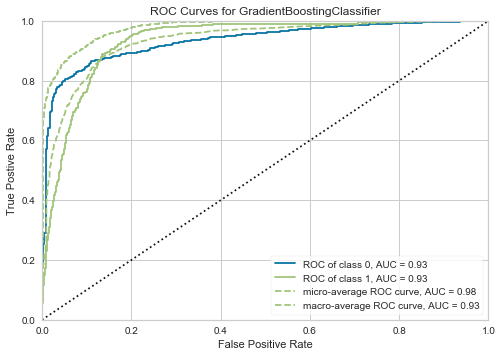

In [12]:
plot_model(tuned_gbc, plot = 'auc')

In [13]:
evaluate_model(tuned_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

'ls' は、内部コマンドまたは外部コマンド、
操作可能なプログラムまたはバッチ ファイルとして認識されていません。


In [15]:
data_unseen = pd.read_csv('sample.csv')

In [16]:
final_gbc= finalize_model(tuned_gbc)
unseen_predictions = predict_model(final_gbc, data=data_unseen)
unseen_predictions.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Label,Score
0,0,36,technician,divorced,professional.course,no,no,no,cellular,may,...,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0,0.0016
1,1,34,admin.,married,university.degree,no,no,no,telephone,sep,...,999,0,nonexistent,-3.4,92.379,-29.8,0.773,5017.5,1,0.7446
2,2,46,self-employed,married,university.degree,no,no,no,cellular,aug,...,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0,0.4160
3,3,36,admin.,single,high.school,no,no,no,cellular,may,...,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,0,0.0013
4,4,36,blue-collar,married,unknown,unknown,no,no,telephone,jun,...,999,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1,0,0.0088
